# The Pursuit: Unraveling Homicides
---
## BUDT 704 - Group 20 (Criminal Minds) :

Lahari Tammera,
Krithika Somasekhar,
Priya Mullaputi,
Abhishek Shetty,
Biruk Makonnen,
Niharika Gupta,
Matthew Lin,
Siddharth Modi

# Introduction :

Let's set the stage.

What's our story? Who is our target audience?

Let's answer these questions before we get started.

Our team of consultants has been hired by the National Board of Crime Agencies* to present at their annual conference for their homicide analysis and prevention event. They have provided us with a robust dataset that includes homicide data on different types of agencies from all over the country from 1980 all the way up to 2014.

They have presented us with the most pressing questions that these agencies would like to have answered. The board and all of the other conference attendees want to learn more about the trends/patterns in homicides over the years, so that they can improve their processes.

*This is not a real organization.

## What questions are we aiming to answer?

**#1 - Weapon Analysis :**  What are the most commonly used weapons in homicides and why might this be the case? What kind of weapons do certain age groups prefer? What kind of weapons do the different genders prefer?

**#2 - Sex & Race Analysis :** What are the sex differences between homicide perpetrators and victims and the race breakdowns of victims? How have the race breakdowns changed over time?

**#3 - Time Analysis :** Are there times when the number of homicides significantly rises or falls, and if so, what may have caused these changes? Does the frequency vary based on season?

**#4 - Agency Effectiveness Analysis :** For the crimes that were solved, which agency types were the most effective? Which states’ agencies were the best at solving the crimes? Which were the worst?

**#5 - Geographic & Predictive Analysis :** What are the regions or cities that have the most homicides? Why? What makes some areas more likely to have homicides, and can we use predictive analysis to find out which neighborhoods are most at risk?

## Why does this matter?

Homicide is a serious social problem with ramifications across society. It affects not only the
criminal justice system but also critically affects social and public health. The focus of our study is to
look deeply into homicide report data and use this to effectively make recommendations to the board and the conference's attendees.

This analysis is important for the betterment of the nation because it will help us understand more about why so many lives are being lost due to homicides. We will be able to see which weapons are most commonly used, which seasons have the highest number of homicides and why, and so on and so forth. With this information, we could save the lives of people by equipping the different agencies with the tools and knowledge necessary to spot and prevent homicide crimes.

## How did we acquire this data?

We start with importing data from Kaggle, where we carefully review a CSV file to make sure it is appropriate for our analysis environment. After that, we turn our attention to data cleansing and missing data management, which is a comprehensive review process that includes finding and addressing missing or unnecessary information as well as getting rid of duplicate records. We perform basic evaluations to comprehend data distributions, identify outliers, and display patterns that serve as a basis for more in-depth insights before fluidly transitioning into exploratory data analysis.we investigate victim age, sex, weapon type, offender sex, and victim race by utilizing the analytical features of libraries such as Pandas and NumPy. Age distribution is shown, and gender, the use of weapons, and the demographics of the offenders are all subtly understood by filtering procedures. We utilize MATLAB's robust data visualization features to clarify the weapon and victim race distribution in the dataset.

## Choice of grading :

We choose to be graded more heavily on **data analysis**.

We believe that the work we did went above and beyond basic data analysis because of the nature of our dataset. Our dataset is incredibly large and requires a lot of visualization work to present to a completely new audience. Our visualizations summarize the dataset well and provide ample context for viewers. We also incorporated a predictive analysis portion, which we felt fit better with data analysis than with data processing. Finally, we believe that since we wanted to understand trends and patterns from our data in order to advise our client better, data analysis was the choice that made more sense.

# Let's get started!

## Importing Libraries :

In [ ]:
# Importing the required libraries to select, filter, and transform data
import numpy as np
import pandas as pd
from numpy import nan as NA

# Importing the required libraries to create visualizations
import seaborn as sns
import scipy
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import plotly.express as px
import plotly.graph_objects as go

## Loading Dataset :

In [ ]:
# Loading our dataset file in to a dataframe for processing and analysis
path = ''
homicides_df = pd.read_csv(path + 'database_Homicide.csv', dtype = { 16: 'str' }) # Perpetrator Age column contains mutiple dtypes, so we import it as str

# Displaying the first few rows of the dataset for a preliminary review
homicides_df.head()

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
0,1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,...,Unknown,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0.0,0.0,FBI
1,2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0.0,0.0,FBI
2,3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0.0,0.0,FBI
3,4,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0.0,0.0,FBI
4,5,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0.0,1.0,FBI


In [ ]:
# Checking the dimensions of our data rows and columns
homicides_df.shape

# Printing the number of rows and columns in the homicides_df DataFrame
print(f'No. of rows: {homicides_df.shape[0]}')
print(f'No. of colums: {homicides_df.shape[1]}')

No. of rows: 41581
No. of colums: 24


In [ ]:
# Loading our datset of latitudes and longitudes of cities in the country into a dataframe for processing & analysis
path = ''
locations_df = pd.read_csv(path + 'uscities.csv', usecols = [0, 3, 6, 7])
locations_df = locations_df.rename(columns = {'city': 'City', 'lat': 'Latitude', 'lng': 'Longitude', 'state_name': 'State'})

# Displaying the first few rows of the dataset for a preliminary review
locations_df.head()

,City,State,Latitude,Longitude
0,New York,New York,40.6943,-73.9249
1,Los Angeles,California,34.1141,-118.4068
2,Chicago,Illinois,41.8375,-87.6866
3,Miami,Florida,25.7840,-80.2101
4,Houston,Texas,29.7860,-95.3885


In [ ]:
# Checking the dimensions of our data rows and coloumns
locations_df.shape

# Printing the number of rows and columns in the locations_df DataFrame
print(f'No. of rows: {locations_df.shape[0]}')
print(f'No. of colums: {locations_df.shape[1]}')

No. of rows: 30844
No. of colums: 4


# Data Cleaning :

In [ ]:
# Dropping some columns that we will not use for further analysis
homicides_df.drop(columns=['Record Source', 'Perpetrator Race', 'Perpetrator Ethnicity'], inplace=True)

The code eliminates these columns in an attempt to streamline the dataset, increase computing performance, cut down on redundancy, and concentrate on the most important aspects for the latter phases of analysis. In order to enable a more effective and efficient analysis process, this operation proposes a planned and focused approach, highlighting the significance of feature selection and simplified data.

In [ ]:
# Checking to see if we have any duplicate rows in our DataFrame
print(f'No. of duplicate rows: {homicides_df.duplicated().sum()}')

No. of duplicate rows: 0


In [ ]:
# Check for missing or blank values in each column of the dataset
missing_vals = homicides_df.isnull().sum()
missing_vals

Record ID            0
Agency Code          0
Agency Name          0
Agency Type          0
City                 0
State                0
Year                 0
Month                0
Incident             0
Crime Type           0
Crime Solved         0
Victim Sex           0
Victim Age           0
Victim Race          0
Victim Ethnicity     0
Perpetrator Sex      0
Perpetrator Age      1
Relationship         1
Weapon               1
Victim Count         1
Perpetrator Count    1
dtype: int64

In [ ]:
# Replacing 'Unknown' with 'NaN'
homicides_df.replace('Unknown', NA,inplace=True)

We want to get rid of outliers and remove them for both victim and perpetrator age to improve the quality of our analysis.

In [ ]:
# Perpertrator age analysis :
# Changing the data type of the 'Perpetrator Age' column
homicides_df['Perpetrator Age'] = pd.to_numeric(homicides_df['Perpetrator Age'], errors='coerce')

#Calculating the mean and standard deviation of the perpetrator age
mean = homicides_df['Perpetrator Age'].mean()
std_dev = homicides_df['Perpetrator Age'].std()

# Defining a threshold (for instance, outliers beyond 3 standard deviations)
threshold = 3

# Filtering the DataFrame to exclude values present beyond the threshold
homicides_df = homicides_df[(homicides_df['Perpetrator Age'] < (mean + threshold * std_dev)) & (homicides_df['Perpetrator Age'] > (mean - threshold * std_dev))]
print(homicides_df['Perpetrator Age'].min())
print(homicides_df['Perpetrator Age'].max())

0.0
75.0


In [ ]:
# Victim age analysis :
#Calculating the mean and standard deviation of the column
mean = homicides_df['Victim Age'].mean()
std_dev = homicides_df['Victim Age'].std()

# Defining a threshold (for instance, outliers beyond 3 standard deviations)
threshold = 3

# Filtering the DataFrame to exclude values present beyond the threshold
homicides_df = homicides_df[(homicides_df['Victim Age'] < (mean + threshold * std_dev)) & (homicides_df['Victim Age'] > (mean - threshold * std_dev))]
print(homicides_df['Victim Age'].min())
print(homicides_df['Victim Age'].max())

0
99


For ages, the outlier value seems to be 0. Let's find how many there are and replace them with NaN.

In [ ]:
# Counting the number of occurrences where 'Victim Age' and 'Perpetrator Age' is 0
print((homicides_df['Victim Age'] == 0).sum())
print((homicides_df['Perpetrator Age'] == 0).sum())

# Replacing the 0 values with NaN
homicides_df['Victim Age'] = np.where(homicides_df['Victim Age'] == 0, np.nan, homicides_df['Victim Age'])
homicides_df['Perpetrator Age'] = np.where(homicides_df['Perpetrator Age'] == 0, np.nan, homicides_df['Perpetrator Age'])

396
12017


## Dataset transformation :

We want to add in the longitudes and latitudes from one of our datasets to the main dataset. This way, we can analyze by location and properly create a visualization based on this data imputation.

In [ ]:
# Merging the homicides_df and locations_df dataframes for analysis
homicides_df = pd.merge(homicides_df, locations_df, on = ['City','State'], how = 'left')
homicides_df.head() # Using this to double check that the latitudes and longitudes have been added in properly

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Victim Race,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Relationship,Weapon,Victim Count,Perpetrator Count,Latitude,Longitude
0,1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,...,Native American/Alaska Native,NaN,Male,15.0,Acquaintance,Blunt Object,0.0,0.0,61.1508,-149.1091
1,2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,...,White,NaN,Male,42.0,Acquaintance,Strangulation,0.0,0.0,61.1508,-149.1091
2,3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,...,Native American/Alaska Native,NaN,NaN,NaN,NaN,NaN,0.0,0.0,61.1508,-149.1091
3,4,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,...,White,NaN,Male,42.0,Acquaintance,Strangulation,0.0,0.0,61.1508,-149.1091
4,5,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,...,Native American/Alaska Native,NaN,NaN,NaN,NaN,NaN,0.0,1.0,61.1508,-149.1091


## Indexing the dataset :

Now, our dataset is almost ready for analysis! Let's take one last step and index the dataset before we perform some exploratory data analysis.

In [ ]:
# Setting the index as the 'Record ID' column for easier viewing
homicides_df.set_index('Record ID', inplace = True)
homicides_df

,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,Crime Solved,...,Victim Race,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Relationship,Weapon,Victim Count,Perpetrator Count,Latitude,Longitude
Record ID,,,,,,,,,,,,,,,,,,,,,
1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,Yes,...,Native American/Alaska Native,NaN,Male,15.0,Acquaintance,Blunt Object,0.0,0.0,61.1508,-149.1091
2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,Yes,...,White,NaN,Male,42.0,Acquaintance,Strangulation,0.0,0.0,61.1508,-149.1091
3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,No,...,Native American/Alaska Native,NaN,NaN,NaN,NaN,NaN,0.0,0.0,61.1508,-149.1091
4,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,Yes,...,White,NaN,Male,42.0,Acquaintance,Strangulation,0.0,0.0,61.1508,-149.1091
5,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,No,...,Native American/Alaska Native,NaN,NaN,NaN,NaN,NaN,0.0,1.0,61.1508,-149.1091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41576,TX11800,Irion,Sheriff,Irion,Texas,1981,November,1,Murder or Manslaughter,Yes,...,White,Not Hispanic,Male,30.0,Acquaintance,Handgun,0.0,0.0,NaN,NaN
41577,TX11900,Jack,Sheriff,Jack,Texas,1981,January,1,Murder or Manslaughter,Yes,...,White,Not Hispanic,Male,26.0,Acquaintance,Firearm,0.0,0.0,NaN,NaN
41578,TX12000,Jackson,Sheriff,Jackson,Texas,1981,January,1,Murder or Manslaughter,Yes,...,White,Not Hispanic,Male,20.0,Acquaintance,Rifle,0.0,0.0,NaN,NaN


The code restructures the DataFrame so that the 'Record ID' values serve as the row identifiers by assigning the 'Record ID' column to the index. This change was made to improve data exploration's simplicity of use and clarity. By assigning a unique identification to the index, We are able to get individual entries, make data retrieval more efficient, and make the DataFrame easier to read overall.

# Exploratory Data Analysis :

To get a better overview of the dataset, let's get a better understanding of our variables and perform some EDA (Exploratory Data Analysis).

In [ ]:
# Defining a function to categorize each column in our DataFrame as Numerical, Date, Text (Unique), or Categorical
def get_var_category(series):
    unique_count = series.nunique(dropna=False)
    total_count = len(series)
    if pd.api.types.is_numeric_dtype(series):
        return 'Numerical' # Checking if the data type of the series is numeric
    elif pd.api.types.is_datetime64_dtype(series):
        return 'Date'
    elif unique_count==total_count:
        return 'Text (Unique)'
    else:
        return 'Categorical'
# Defining a function to print the category of each column in the DataFrame
def print_categories(df):
    for column_name in df.columns:
        print(column_name, ": ", get_var_category(df[column_name])) # Printing the column name and its category as determined
print_categories(homicides_df)

Agency Code :  Categorical
Agency Name :  Categorical
Agency Type :  Categorical
City :  Categorical
State :  Categorical
Year :  Numerical
Month :  Categorical
Incident :  Numerical
Crime Type :  Categorical
Crime Solved :  Categorical
Victim Sex :  Categorical
Victim Age :  Numerical
Victim Race :  Categorical
Victim Ethnicity :  Categorical
Perpetrator Sex :  Categorical
Perpetrator Age :  Numerical
Relationship :  Categorical
Weapon :  Categorical
Victim Count :  Numerical
Perpetrator Count :  Numerical
Latitude :  Numerical
Longitude :  Numerical


The code gives a thorough description of the characteristics of each column in the dataset by differentiating between date, category, and numerical variables. This classification is crucial since it provides the framework for customized analytical methods and well-informed decision-making. we are better equipped to use suitable statistical measurements, visualization approaches, and modeling tactics when we know whether a variable is numerical, categorical, or temporal. Additionally, the code highlights columns that have distinct text values, indicating possible areas that need extra investigation, including abnormalities or inconsistencies in the data.

In [ ]:
# Analyzing the statistics of the victims age from our dataset
homicides_df['Victim Age'].describe()

count    41011.000000
mean        35.160737
std         17.685319
min          1.000000
25%         23.000000
50%         30.000000
75%         43.000000
max         99.000000
Name: Victim Age, dtype: float64

We discover that half of the victims are 30 years of age or younger, with a median age of 30.0, providing a measure of central tendency. The middle 50% of ages appear to lie within the interquartile range (IQR) of 22.0 to 41.0, indicating a wide variety of victim ages. But the extreme figures (0 and 998) raise red flags, suggesting that there could be outliers or issues with the quality of the data that need to be looked into further. The age distribution appears to be skewed to the right, as indicated by the somewhat wider range between Q2 and Q3 than between Q1 and Q2. The general tendency and diversity in victim ages are both highlighted by this detailed study, highlighting the significance of taking into account the larger context and any anomalies in the data in later conclusions.

In [ ]:
# Analyzing the statistics of the perpetrator age from our dataset
homicides_df['Perpetrator Age'].describe()

count    29389.000000
mean        31.060635
std         12.219567
min          1.000000
25%         22.000000
50%         28.000000
75%         37.000000
max         75.000000
Name: Perpetrator Age, dtype: float64

With a total count of 638,453 entries, the dataset shows a broad variety of ages for the perpetrators, from 0 to 99 years old. The average age of those who commit crimes is roughly 20.32 years old, which indicates a comparatively youthful profile. The 17.89 standard deviation, on the other hand, suggests that there is a good deal of variation around this mean. The right-skewed distribution is indicated by the quartiles, which show that 25% of the instances contain perpetrators who are 0 years old, while the median (50th percentile) age is 21. The wide range of ages represented in the perpetrators of crimes is shown by the interquartile range (IQR) that extends from 0 to 31 years between the 25th and 75th percentiles. Interestingly, a sizable percentage of cases (25th percentile) have offenders who are under the age of zero, which may indicate cases in which the offender's age is either irrelevant or unknown.

In [ ]:
# Getting all the unique categories of Agency Type
homicides_df['Agency Type'].unique()

array(['Municipal Police', 'County Police', 'State Police', 'Sheriff',
       'Special Police', 'Regional Police'], dtype=object)

In [ ]:
# Getting all the unique categories of Crime Type
homicides_df['Crime Type'].unique()

array(['Murder or Manslaughter', 'Manslaughter by Negligence'],
      dtype=object)

# Data Analysis & Visualization :

Let's take a closer look at the data using some visualizations. We want to answer a variety of questions based on the data, so that we can improve our understanding of the homicide data and maybe even predict some trends. Mainly, we want to be able to view the data in a concise manner and then make some inferences based on our visualizations.

Let's get started!

## Question of Interest #1 : Weapon Analysis

What are the most commonly used weapons in homicides and why might this be the case? What kind of weapons do certain age groups prefer? What kind of weapons do the different genders prefer?

Let us first discuss part one of our question. What are the most common weapons used in homicides and why might this be the case?

In [ ]:
weapon_count = homicides_df['Weapon'].value_counts()
weapon_count

Handgun          19372
Knife             7696
Blunt Object      4342
Shotgun           3222
Rifle             2085
Firearm           1527
Strangulation      688
Fire               551
Suffocation        251
Gun                131
Drowning           104
Explosives          38
Drugs               36
Fall                28
Poison              28
Name: Weapon, dtype: int64

### Let's make an observation based on the initial breakdown :

Handguns are the most common weapon in these kinds of situations, suggesting that they are widely available and versatile. The use of knives and blunt items later on emphasizes how important close-quarters physical aggression is. The various ways that guns are used, including shotguns, rifles, and general purpose guns, add up to a significant number. There are also less prevalent techniques like drowning, fire, suffocation, and strangulation, all of which shed light on the various circumstances surrounding some crimes.

### Now, let's create a visualization of this!

We want to be able to view the most common weapons used in homicides over the years and make an inference based on the visualization.

In [ ]:
# Setting a threshold value to categorize weapon usage counts
threshold = 10000
weapon_count = homicides_df['Weapon'].value_counts()
small_counts = weapon_count[weapon_count < threshold]

# Creating a new category named 'Other' in the 'weapon_count' Series
# Summing up the counts of all weapon types that fall below the threshold and assigning this sum to 'Other'
weapon_count['Other'] = weapon_count[small_counts.index].sum()

# Dropping weapon types with counts below the threshold from the 'weapon_count' Series
weapon_count.drop(small_counts.index, inplace=True)

# Creating a pie chart to visualize weapon counts
fig = px.pie(weapon_count, values=weapon_count.values, names=weapon_count.index,
             title='<b>WEAPON COUNTS</b>',
             labels = {'Other': 'Other weapons'},
             hole=0.3)

fig.show()

### Let's make an inference based on our visualization :

Numerous factors may have an impact on the observed distribution of weapon types in homicides, with guns clearly leading the way. Handguns are a common choice in criminal activities because of their accessibility, portability, and simplicity of concealment. Furthermore, the statistics may indicate that pistols are widely accessible in different neighborhoods, which may account for their increased prevalence in violent situations. The explosion of other weapon types, like as knives and blunt weapons, is either negligible or nonexistent, indicating that they are there consistently but do not eclipse handguns.

Next, let's discuss part two of our first question. What kind of weapons do certain age groups prefer?

In [ ]:
# Defining age bins and labels for categorizing perpetrators into age groups
age_bins = [1, 10, 20, 30, 40, 50, 60, 70, 80]
age_labels = ['1-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70']
age_labels.append('71-80')

# Create a new column in the DataFrame to categorize perpetrators by age group
homicides_df['Perpetrator Age Group'] = pd.cut(homicides_df['Perpetrator Age'], bins=age_bins, labels=age_labels, right=False)
weapon_counts = homicides_df.groupby(['Perpetrator Age Group', 'Weapon']).size().unstack(fill_value=0)

# Identify the most common weapon in each age group
weapon_by_age = weapon_counts.idxmax(axis=1)
weapon_counts_age = weapon_counts.max(axis=1)

# Create a summary DataFrame with age group, most common weapon, and count
weapon_age_df = pd.DataFrame({'Age Group':weapon_by_age.index, 'Weapon':weapon_by_age.values, 'Count': weapon_counts_age.values })
print(weapon_age_df.sort_values(by='Count', ascending=False))

  Age Group   Weapon  Count
2     21-30  Handgun   5369
3     31-40  Handgun   3654
4     41-50  Handgun   1743
1     11-20  Handgun   1558
5     51-60  Handgun    991
6     61-70  Handgun    444
7     71-80  Handgun    129
0      1-10  Handgun      9


### Let's make an observation based on this information :

Across all age groups in the dataset, the most common weapon is the handgun.

Let's use a visualization now to understand the weapon counts by age group.

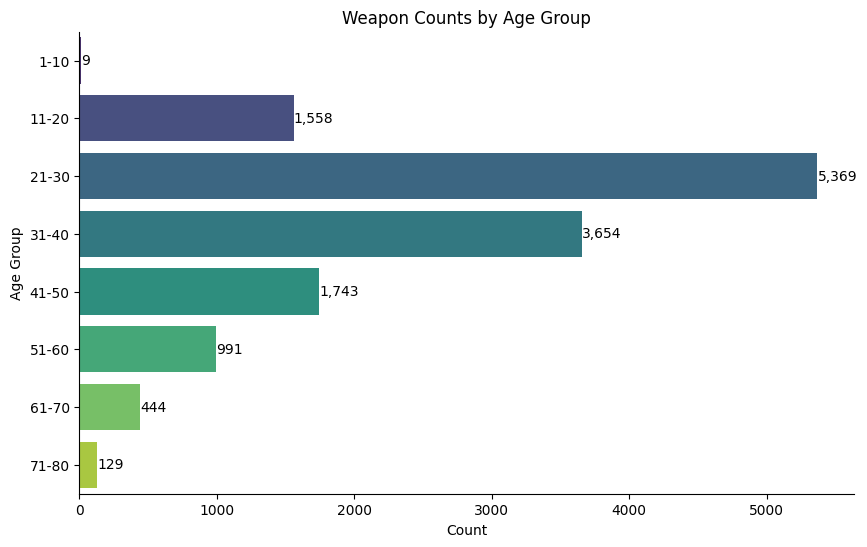

In [ ]:
# Creating a horizontal bar chart
colors = sns.color_palette("viridis", len(weapon_age_df))
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='Count', y='Age Group', data=weapon_age_df, palette=colors)
plt.xlabel('Count')
plt.ylabel('Age Group')
plt.title('Weapon Counts by Age Group')
sns.despine()
for index, value in enumerate(weapon_age_df['Count']):
    bar_plot.text(value, index, f'{value:,}', ha='left', va='center', color='black')

plt.show()

### Let's make an inference based on our visualization :

Limited access to quality education, employment opportunities, and positive role models can lead some young individuals to engage in risky behaviors, including the use of handguns. Easy accessibility to handguns due to lack of proper firearm background checks and illegal methods to acquire guns could also play a part here. Individuals in the 60 and above age group may have achieved a level of financial stability and retirement. They might also have some physical limitations that often come with aging, such as reduced strength and dexterity, which may make handling and using handguns more challenging. Whereas with the younger population, they have the savviness to learn how to acquire these weapons and use them in negative ways.

Finally, let's discuss part three of our first question. What kind of weapons do the different genders prefer?

In [ ]:
# Group the DataFrame by Perpetrator Sex and Weapon, and count the occurrences of each weapon
weapon_counts_sex = homicides_df.groupby(['Perpetrator Sex', 'Weapon']).size()

weapon_counts_sex

Perpetrator Sex  Weapon       
Female           Blunt Object       284
                 Drowning            18
                 Drugs                5
                 Explosives           3
                 Fall                 5
                 Fire                58
                 Firearm             70
                 Gun                 14
                 Handgun           1900
                 Knife             1171
                 Poison              11
                 Rifle              219
                 Shotgun            242
                 Strangulation       26
                 Suffocation         46
Male             Blunt Object      2867
                 Drowning            55
                 Drugs               24
                 Explosives          15
                 Fall                18
                 Fire               283
                 Firearm            595
                 Gun                 46
                 Handgun          12515
         

### Let's make an observation based on this information :

Here, we can see that female perpetrators' top 3 weapon choices are :

1. Handgun (17030)
2. Knife (13810)
3. Blunt object (5682)

Male perpetrators' top 3 weapon choices are :

1. Handgun (198516)
2. Knife (61060)
3. Blunt object (45753)

### Let's make an inference based on this information :

Regardless of the genders represented here, it seems that the top three choices are the same. Why might this be the case? People might choose their weapon based on what they perceive to be the most effective based on media, their personal opinions, etc. They might also choose options like guns and knives because they intend to threaten their victims before they harm them. Blunt objects might be due to crimes of passion which were not pre-meditated and the perpetrator happened to find an object that they used to harm their victim. These weapons might also be the most accessible in America.

## Question #2 : Sex & Race Analysis

What are the sex differences between homicide perpetrators and victims and the race breakdowns of victims? How have the race breakdowns changed over time?

Let's first take a look at the sex breakdown between perpetrators and victims. First, we will do some basic analysis on victim sex versus perpetrator sex.

In [ ]:
# Creating homicides count based on victim sex to see the distributions
victim_sex_count = homicides_df['Victim Sex'].value_counts()
victim_sex_count

Male      32365
Female     9037
Name: Victim Sex, dtype: int64

In [ ]:
# Creating homicides count based on perpetrator sex for comparision
perpetrator_sex_count = homicides_df['Perpetrator Sex'].value_counts()
perpetrator_sex_count

Male      26060
Female     4202
Name: Perpetrator Sex, dtype: int64

### Let's make an observation based on the initial breakdown :

With 494,125 occurrences, the data shows that men make up a significant majority of the victims. This greatly exceeds the 143,345 recorded number of female victims. The dataset may have limitations because of inadequate or non-disclosed gender information in some situations, as seen by the inclusion of a category labeled 'Unknown' containing 984 events. The notable gap between the number of victims by gender begs the question of what factors are at play and necessitates more research into the demographics of homicide episodes. Remarkably, there are notably 399,541 more occurrences with male perpetrators than with female perpetrators. A significant obstacle to fully comprehending the gender distribution is the high presence of the 'Unknown' category, which accounts for 190,365 events. This raises concerns regarding reporting procedures or the constraints of data collection. At 48,548 per year, female offenders are quite uncommon.

### Now, let's create a visualization of this!

We want to be able to view the breakdown between perpetrator sex and victim sex and create an inference based on the visualization.

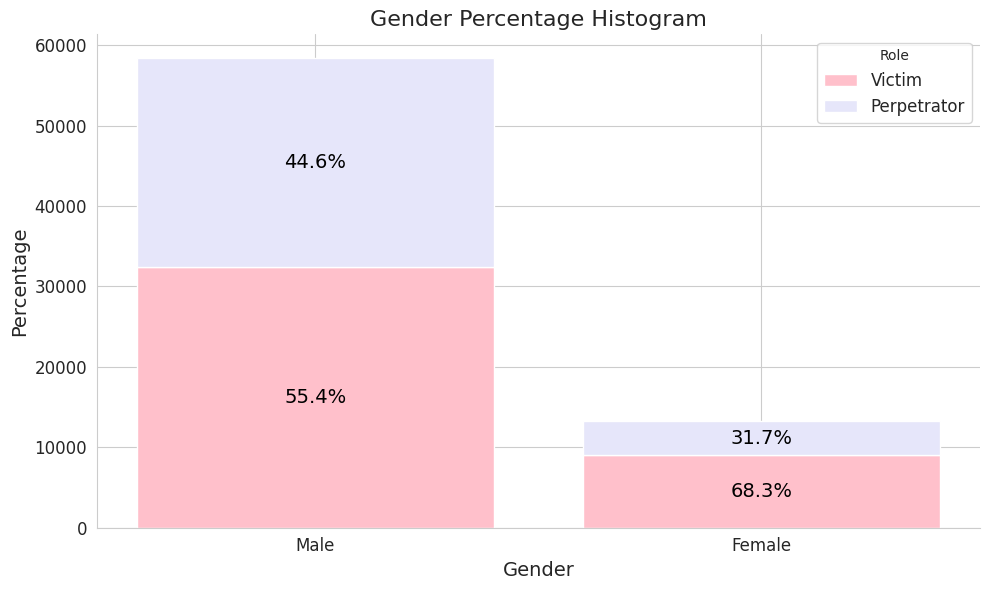

In [ ]:
# Extracting index and counts of 'Victim Sex' and 'Perpetrator Sex' from the dataset
x = homicides_df['Victim Sex'].value_counts().index
y1 = homicides_df['Victim Sex'].value_counts()
y2 = homicides_df['Perpetrator Sex'].value_counts()

# Creating a DataFrame with Gender, Victim count, and Perpetrator count
data = pd.DataFrame({'Gender': x, 'Victim': y1, 'Perpetrator': y2})
# Setting colors for the bars in the plot
victim_color = 'pink'
perpetrator_color = 'lavender'

sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
# Looping through each gender to plot the data
for i, gender in enumerate(x):
    total_count = y1[i] + y2[i] # Calculating the total count for each gender
    victim_percentage = y1[i] / total_count * 100  # Calculating the victim percentage
    perpetrator_percentage = y2[i] / total_count * 100   # Calculating the perpetrator percentage
 # Creating a stacked bar plot for each gender
    plt.bar(x[i], y1[i], color=victim_color, label="Victim" if i == 0 else "")
    plt.bar(x[i], y2[i], bottom=y1[i], color=perpetrator_color, label="Perpetrator" if i == 0 else "")

    plt.text(i, y1[i] / 2, f'{victim_percentage:.1f}%', ha='center', va='center', color='black', fontsize=14)
    plt.text(i, y1[i] + y2[i] / 2, f'{perpetrator_percentage:.1f}%', ha='center', va='center', color='black', fontsize=14)
# Setting labels and title for the plot
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.title('Gender Percentage Histogram', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.despine(top=True, right=True)

plt.legend(title="Role", labels=["Victim", "Perpetrator"], fontsize=12)
# Adjusting the layout and displaying the plot
plt.tight_layout()
plt.show()

### Let's make an inference based on our visualization :

The gender distribution of homicide victims and perpetrators is shown in the stacked bar chart. Males predominate in both occupations, with far greater counts than females; this could be a reflection of underlying criminological and social trends. Crime statistics in the past have consistently demonstrated that men are more likely than women to be involved in violent crimes, both as offenders and victims. This could be due to a number of things, including socialization, cultural norms, and the frequency of particular risk factors that are more common in men.Furthermore, the noteworthy number of gender cases that are marked as "Unknown" highlights difficulties in gathering and reporting data, either pointing to holes in the investigation process or restrictions in the resources available.

Next, let's do some basic analysis on victim race and make an observation.

In [ ]:
# Creating a count based on race to see who is affected the most
victim_race_count = homicides_df['Victim Race'].value_counts()
victim_race_count

White                            21860
Black                            18190
Asian/Pacific Islander             335
Native American/Alaska Native      268
Name: Victim Race, dtype: int64

According to the statistics, 317,422 instances are classified as White victims, and 299,899 incidents are classified as Black victims. These numbers indicate that White victims make up the majority of victims. Comparably fewer victims—9,890 for Asian/Pacific Islanders and 4,567 for Native Americans/Alaska Natives—have been reported in these categories. This analysis clarifies the differences in racial backgrounds among victims.

### Let's make an observation based on the initial breakdown :

According to the statistics, 317,422 instances are classified as White victims, and 299,899 incidents are classified as Black victims. These numbers indicate that White victims make up the majority of victims. Comparably fewer victims—9,890 for Asian/Pacific Islanders and 4,567 for Native Americans/Alaska Natives—have been reported in these categories. This analysis clarifies the differences in racial backgrounds among victims.

### Now, let's create a visualization of this!

We want to be able to view the breakdown of victim race over time and how it has changed.

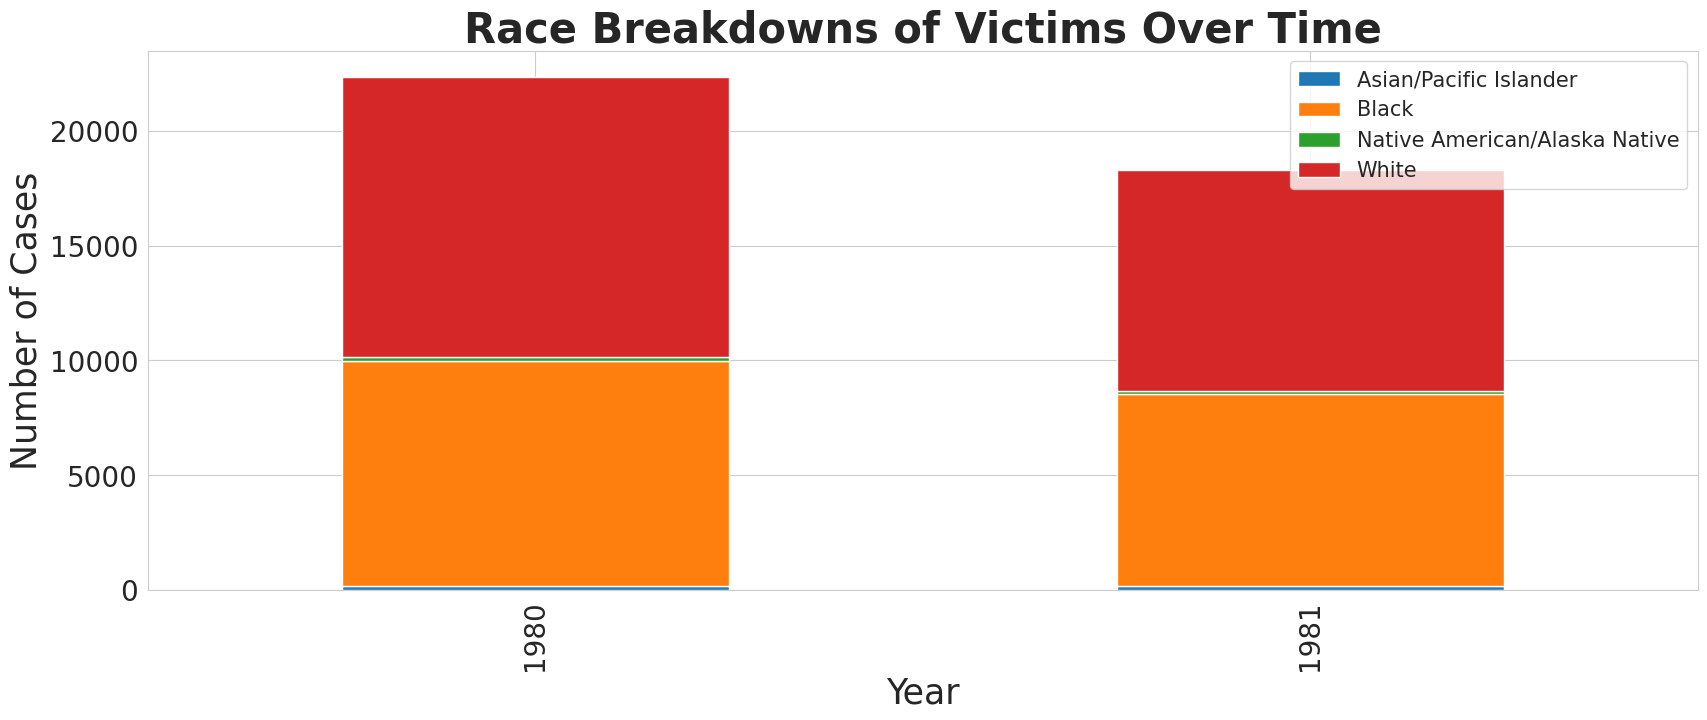

In [ ]:
# Analyzing the breakdown of homicide victim's race over time
race_breakdown_df = homicides_df.groupby(['Year', 'Victim Race']).size().unstack().fillna(0)

# Creating a stacked bar plot from the 'race_breakdown_df' DataFrame
fig, ax = plt.subplots(figsize=(20, 7))
race_breakdown_df.plot(kind='bar', stacked=True, ax=ax)

plt.title('Race Breakdowns of Victims Over Time', fontsize=30, fontweight='bold')
plt.xlabel('Year', fontsize=25)
plt.ylabel('Number of Cases', fontsize=25)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=15)

plt.show()

### Let's make an inference based on this visualization :

Why does the graph for Black American homicide victims rise from 1987 up to a peak in 1993? What might have been some factors that made perpetrators target Black Americans at such an alarming increase? From the late 80s to the early 90s, there were a lot of social, economic, and political issues occurring across America. Police brutality, the HIV and AIDS crisis, racial tensions, etc. were only a few of the issues impacting America's people. Black Americans and other marginalized groups (such as the Native American populations) were targetted at a higher rate and were impacted negatively by all of these various social and political issues.

## Question #3 : Time Analysis

Are there times in a year when the number of homicides significantly rises or falls, and if so, what may have caused these changes? Does the frequency vary based on season?

In [ ]:
# Grouping homicides by Month for analysis
homicide_by_month = homicides_df.reset_index().groupby(by='Month')['Record ID'].count().reset_index()
homicide_by_month.rename(columns={'Record ID': 'Count'}, inplace=True)

# Sorting data for the Month column
months = ["January", "February", "March", "April", "May", "June",
          "July", "August", "September", "October", "November", "December"]
homicide_by_month['Month'] = pd.Categorical(homicide_by_month['Month'], categories=months, ordered=True)
homicide_by_month.sort_values(by='Month', inplace=True)

# Defining X-values and Y-values
x_val = homicide_by_month['Month']
y_val = homicide_by_month['Count']

# Creating a DataFrame from month and count
data = {'Month': x_val, 'Count': y_val}
homicide_by_month = pd.DataFrame(data)

# Creating the chart of Months vs Count of Homicides
fig = px.scatter(homicide_by_month, x='Month', y='Count', title='Homicide Frequency by Month')
fig.update_traces(marker=dict(size=12), showlegend=False) # Increasing marker size.

# Adding a trace for each data point to show year and count
fig.add_trace(go.Scatter(x=x_val, y=y_val,
                         mode='lines+markers', marker=dict(size=8, color='blue'), line=dict(width=2),
                         hovertemplate='<b>Month:</b> %{x}<br><b>Count:</b> %{y}'))
fig.update_traces(showlegend=False)

# Customizing layout and style of the chart
fig.update_layout(
    xaxis=dict(title='Month', tickfont=dict(size=12, color='black')),
    yaxis=dict(title='Count of Homicides', tickfont=dict(size=12, color='black')),
    title=dict(text='Homicide Frequency by Month', font=dict(size=24, family='Arial')),
    font=dict(family='Arial', size=14, color='black'),
    paper_bgcolor='rgba(255,255,255,0.7)',
    plot_bgcolor='rgba(240,240,240,0.7)',
)
fig.show()

### Let's create an observation based on this visualization :

There is a clear seasonal trend to the number of homicides; they peak in June and September and reach a low point in February. Interestingly, there is a decrease from August to November, indicating that there may be variations in violent occurrences in these months. As for seasons, an observation that we can make is that the highest number of homicides occur in the summer and the lowest number of homicides occur in peak winter.

### Let's create an inference based on this visualization :

The monthly variation in the number of homicides indicates a clear trend: there are more homicides in June through September and fewer homicides in February. There could be a number of reasons for the higher rates over the summer, including more people engaging in outdoor activities, more social interactions, and possible dispute escalation. All of these things could lead to an increase in violent occurrences. Furthermore, in some areas, warmer weather is frequently associated with greater crime rates. Conversely, the colder weather and fewer outdoor activities may have contributed to February's lower homicide rates by reducing the likelihood of confrontation or criminal activity. The cyclical nature of these oscillations is further highlighted by the observed drop from August to November, which implies that there may be a dip in the elements that lead to increased violence as summer gives way to fall. In addition, better weather might spur people to be outside more often and perpetrators have an easier time finding victims. Another reason could be that perpetrators have more free time during the summer, giving them ample time and freedom to commit these crimes.

## Question #4 : Agency Effectiveness Analysis

For the crimes that were solved, which agency types were the most effective? Which states’ agencies were the best at solving the crimes? Which were the worst?

In [ ]:
# Listing all the agency types and counting their occurrences in the dataset
homicides_df['Agency Type'].value_counts()

# Creating a DataFrame to analyze the count of solved and unsolved cases by agency type
crime_solved_by_agency = homicides_df.groupby('Agency Type')['Crime Solved'].value_counts().unstack()
crime_solved_by_agency

Crime Solved,No,Yes
Agency Type,,
County Police,483,754
Municipal Police,8818,22791
Regional Police,5,13
Sheriff,1547,5542
Special Police,35,138
State Police,257,1024


### Let's create an observation based on this information :

Across all agency types, these were the top 3 most effective in solving crimes :

1. Municipal Police (333447)
2. Sheriffs (81972)
3. County Police (15035)

### Let's create an inference based on this information :

Why might these be the top 3 agency types? We could infer that these 3 agency types are provided with the most resources because they are all based in smaller regions, but still have enough constituents that it makes sense for them to receive a higher number in resource allocation. All 3 also collaborate with other local jurisdictions, giving them more man power than just their agency's employees. In addition, they might all have a better grasp on their local communities and have more information on the citizens that live in their area, giving them a slight potential leg up in finding and solving homicies.

In [ ]:
# Group the 'homicides_df' DataFrame by 'State' and 'Crime Solved' columns and count occurrences
crime_solved_by_agency = homicides_df.groupby('State')['Crime Solved'].value_counts().unstack()

# Sum up the total case numbers for each state
crime_solved_by_agency['Total cases'] = crime_solved_by_agency[['No','Yes']].sum(axis=1)

# Calculating the percentage for the solved cases in each state
solved_percentage = crime_solved_by_agency['Yes']/crime_solved_by_agency['Total cases']*100
print(solved_percentage.sort_values(ascending=False).head(10))
print('\n')
print(solved_percentage.sort_values(ascending=True).head(10))

State
Vermont           100.000000
South Dakota       93.333333
South Carolina     92.022792
Alabama            89.341693
Nebraska           88.596491
Montana            88.461538
Mississippi        88.260870
North Carolina     88.068670
Idaho              87.837838
Kansas             87.195122
dtype: float64


State
District of Columbia    45.255474
New Mexico              54.109589
Missouri                56.538462
New York                58.295852
Florida                 65.926893
New Jersey              66.697164
Nevada                  67.092652
Massachusetts           68.632075
Utah                    69.811321
Maryland                70.068027
dtype: float64


### Let's create an observation based on this information :

The 3 states with the highest homicides solved percentages are :

1. North Dakota
2. Montana
3. South Dakota

The states with the lowest homicides solved percentages is (excluding Washington DC, the territory) :

New York

### Let's create an inference based on this information :

All 3 of the states with the highest homicides solved percentages are not dense and do not have high populations. This could be a reason that crimes are more likely to be solved because there aren't that many people = there aren't many homicides occuring = even if there are homicides occurring, they are solved at a higher rate because there are a lot more resources being dedicated to the few cases that come in.

New York's poor homicide solving success rate could be because of the lack of resources and manpower to focus on the homicides that are coming in, especially for New York City.

## Question #5 : Geographic Analysis & Predictive Analysis

What are the regions or cities that have the most homicides? Why? What makes some areas more likely to have homicides, and can we use predictive analysis to find out which neighborhoods are most at risk?

Let's create a visualization of this. We want to be able to view the cities with the highest homicide rates and then create an observation and an inference based on what we see.

In [ ]:
# Creating a new DataFrame 'city_homicide_counts' with selected columns from 'homicides_df'
# Selecting 'City', 'State', 'Longitude', and 'Latitude' columns for geographical analysis of homicides
city_homicide_counts = homicides_df.loc[:,['City','State','Longitude', 'Latitude']]
city_homicide_counts = pd.DataFrame({'Count': city_homicide_counts.groupby(['City','State','Longitude', 'Latitude']).size()}).reset_index()
city_homicide_counts.sort_values(by = 'Count', ascending = False)

,City,State,Longitude,Latitude,Count
440,New York,New York,-73.9249,40.6943,3370
348,Los Angeles,California,-118.4068,34.1141,3172
646,Wayne,Michigan,-83.3877,42.2774,1283
482,Philadelphia,Pennsylvania,-75.1339,40.0077,845
146,Dallas,Texas,-96.7667,32.7935,422
...,...,...,...,...,...
247,Hanover,Virginia,-77.3707,37.7668,1
246,Hancock,Iowa,-95.3636,41.3924,1
237,Green Lake,Wisconsin,-88.9561,43.8441,1
235,Grant,Minnesota,-92.9090,45.0825,1


In [ ]:
# Generating a token
mapbox_access_token = 'pk.eyJ1Ijoibmd1cHRhMTAiLCJhIjoiY2xwNHk1MXB1MDE3aTJqc2hwY2NlMDBtOSJ9.QamAm3h-eeOhPGhgJDkVAQ'

In [ ]:
# Setting up color scheme and limits for different homicide count ranges
colors = ["royalblue","crimson","lightseagreen","orange"]
limits = [(0,500),(500,1000),(1000,3000),(3000,5000)]
cities = []
scale = 10
fig = go.Figure()
# Looping through each limit range to create a scattergeo plot for each range
for i in range(len(limits)):
    lim = limits[i]
    df_sub = city_homicide_counts[(city_homicide_counts['Count'] >= lim[0]) & (city_homicide_counts['Count'] < lim[1])]
    fig.add_trace(go.Scattergeo(  # Adding a scattergeo plot for the current limit range
        locationmode = 'USA-states',
        lon = df_sub['Longitude'],
        lat = df_sub['Latitude'],
        text = df_sub['Count'],
        marker = dict(
            size = df_sub['Count']/scale,
            color = colors[i],
            line_color = 'rgb(40,40,40)',
            line_width = 0.5,
            sizemode = 'area'
        ),
        name = '{0} - {1}'.format(lim[0],lim[1])))
# Updating the layout of the figure
fig.update_layout(
    title_text='HOMICIDE FREQUENCY BY LOCATION',
    showlegend=True,
    geo=dict(
        scope='usa',
        landcolor='rgb(217, 217, 217)',
    ),
    geo2=dict(
        resolution=50,
        lonaxis=dict(range=[-130, -60]),
        lataxis=dict(range=[20, 50]),
    ),
    height=600,
    width=900
)
fig.show()

### Let's make an observation based on our visualization :

The given code provides a thorough analysis of the homicide data, first classifying it by city to ascertain the total number of homicides in each. Los Angeles, Chicago, and New York are the three cities with the highest incidence of homicides, while the top 10 cities with the highest counts are prominently displayed in the resulting bar chart. This graphic depiction gives a clear picture of the cities with high homicide rates by highlighting the spatial distribution of violent episodes.Furthermore, the code looks at data at the state level to determine the weapon most frequently used in homicides in each state, providing a more comprehensive view of the various techniques utilized in deadly situations in various locations.

### Let's make an inference based on our visualization :

A number of intricate socioeconomic and demographic factors may contribute to increased homicide rates in Los Angeles, Chicago, and New York City. Big cities frequently struggle with problems like gang activity, poverty, and a concentration of underprivileged neighborhoods. Homicides and other crimes may occur at higher rates as a result of these circumstances. Social unrest and criminal activity may be exacerbated by economic inequality and restricted access to jobs and educational possibilities in some communities. Increased population density, difficulties with law enforcement, and easier access to firearms could all contribute to an increased risk of violent occurrences. The convergence of these factors in major metropolitan areas such as Los Angeles, Chicago, and New York highlights the need for targeted and multifaceted approaches to address the underlying causes of violence.

Let's move to the next part of our question 5. What makes some areas more likely to have homicides, and can we use predictive analysis to find out which neighborhoods are most at risk?

In [ ]:
df= homicides_df.copy()

# Create a binary feature 'HighRisk' based on 'Victim Count' (1 if Victim Count > 0, else 0)
df['HighRisk'] = df['Victim Count'].apply(lambda x: 1 if x > 0 else 0)

# Defining the features to be used for modeling
features = ['City', 'Weapon', 'Relationship', 'Victim Age', 'Perpetrator Age', 'Victim Race']

# Defining categorical columns for label encoding
category_cols = ['City', 'Weapon', 'Relationship', 'Victim Race']

encoders = {}  # Initializing a dictionary to store label encoders for later use

# Apply label encoding to categorical columns and store the encoders
for f in category_cols:
    encoder = LabelEncoder()
    df[f] = encoder.fit_transform(df[f])
    encoders[f] = encoder

X_train, X_test, y_train, y_test = train_test_split(df[features], df['HighRisk'], test_size=0.2, random_state=0)

# Initialize a SimpleImputer to handle missing values with mean imputation
imputer = SimpleImputer(strategy='mean')

# Impute missing values in the training and testing sets
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Initializing a RandomForestClassifier model
model = RandomForestClassifier(random_state=0)

# Train the model on the imputed training data
model.fit(X_train_imputed, y_train)

# Make predictions on the imputed testing data
preds = model.predict(X_test_imputed)

# Calculate accuracy of the model
accuracy = accuracy_score(y_test, preds)

print('Accuracy:', accuracy)

Accuracy: 0.9420429847862835


What does it mean that the accuracy is 0.921? This means that the model accurately predicted high risk instances/not for 92.1% of the cases in the test set.

In [ ]:
# Geting feature importances from the trained model
feature_importances = model.feature_importances_

# Creating a DataFrame with feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sorting the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

feature_importance_df

,Feature,Importance
0,City,0.325998
3,Victim Age,0.272900
4,Perpetrator Age,0.178044
1,Weapon,0.123213
2,Relationship,0.078013
5,Victim Race,0.021832


### Let's create an observation based on this information :

Here, we can see that the 3 most important factors that determine the frequency of homicides are:

1. City
2. Victim Age
3. Perpetrator Age

### <span style="color:red">PREDICTIVE ANALYSIS IS INCOMPLETE. PLEASE FILL IN.</span>

# Conclusions :

Wow! We went through a lot of information today.

Let's summarize our findings and understand why these results are meaningful.

### <span style="color:red">FILL IN HERE</span>